# Tutorial: Neural Networks for Image Classification without Convolution

In [1]:
# Change directory, only necessary for this notebook
import sys, os
sys.path.insert(0,os.path.abspath('../../../'))

## Imports

In [2]:
import pandas as pd
import numpy as np
import mnist
import scipy.misc

from PIL import Image

from pyml.neural_network.nn import NN
from pyml.neural_network.layer.transformation import *
from pyml.neural_network.layer.activation import *
from pyml.neural_network.optimizer import *
from pyml.neural_network.loss import *
from pyml.utils.accuracy import *

## Prepare data

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

### Normalize data

In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Reshape data

In [5]:
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

## Build the neural network

In [6]:
model = NN()

model.add_layer(Dense(28 * 28, 512))
model.add_layer(ReLU())
model.add_layer(Dropout(0.2))
model.add_layer(Dense(512, 10))
model.add_layer(Softmax())

model.set_loss(CategoricalCrossentropy())
model.set_optimizer(SGD(learning_rate=0.001, momentum=0.98))
model.set_accuracy(MultiClassAccuracy())

model.build()

In [7]:
model.train(
    train_images, 
    train_labels, 
    validation_data=(test_images, test_labels), 
    epochs=5, 
    batch_size=16, 
    print_summary_every=1, 
    verbose=1
)

training: Epoch: 0/5
epoch, acc: 0.490, loss: 2.221 (data_loss: 2.221, reg_loss: 0.000), lr: 0.001
validation, acc: 0.625, loss: 1.993 (data_loss: - - -, reg_loss: - - -), lr: - - -
training: Epoch: 1/5
epoch, acc: 0.679, loss: 1.717 (data_loss: 1.717, reg_loss: 0.000), lr: 0.001
validation, acc: 0.688, loss: 1.113 (data_loss: - - -, reg_loss: - - -), lr: - - -
training: Epoch: 2/5
epoch, acc: 0.772, loss: 1.057 (data_loss: 1.057, reg_loss: 0.000), lr: 0.001
validation, acc: 0.688, loss: 0.752 (data_loss: - - -, reg_loss: - - -), lr: - - -
training: Epoch: 3/5
epoch, acc: 0.819, loss: 0.753 (data_loss: 0.753, reg_loss: 0.000), lr: 0.001
validation, acc: 0.750, loss: 0.626 (data_loss: - - -, reg_loss: - - -), lr: - - -
training: Epoch: 4/5
epoch, acc: 0.844, loss: 0.614 (data_loss: 0.614, reg_loss: 0.000), lr: 0.001
validation, acc: 0.875, loss: 0.554 (data_loss: - - -, reg_loss: - - -), lr: - - -


## Test the model on a single image

In [8]:
# Image number in test set
i = 90

# Factor by which the image is scaled for better representation
resize_factor = 10

Image of the number 3
The prediction is 3


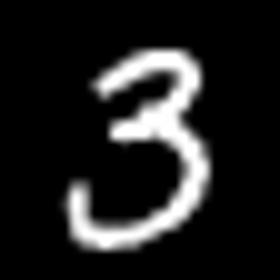

In [9]:
img = (test_images[i].reshape(28, 28) * 255 / np.max(test_images[i])).astype('uint8')

pred = np.argmax(model.predict(test_images[i]))

print(f'Image of the number {test_labels[i]}')
print(f'The prediction is {pred}')

Image.fromarray(img).resize((28*resize_factor, 28*resize_factor))